In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


C:\Users\sriva\AppData\Local\Temp\ipykernel_11620\4104951855.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sriva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


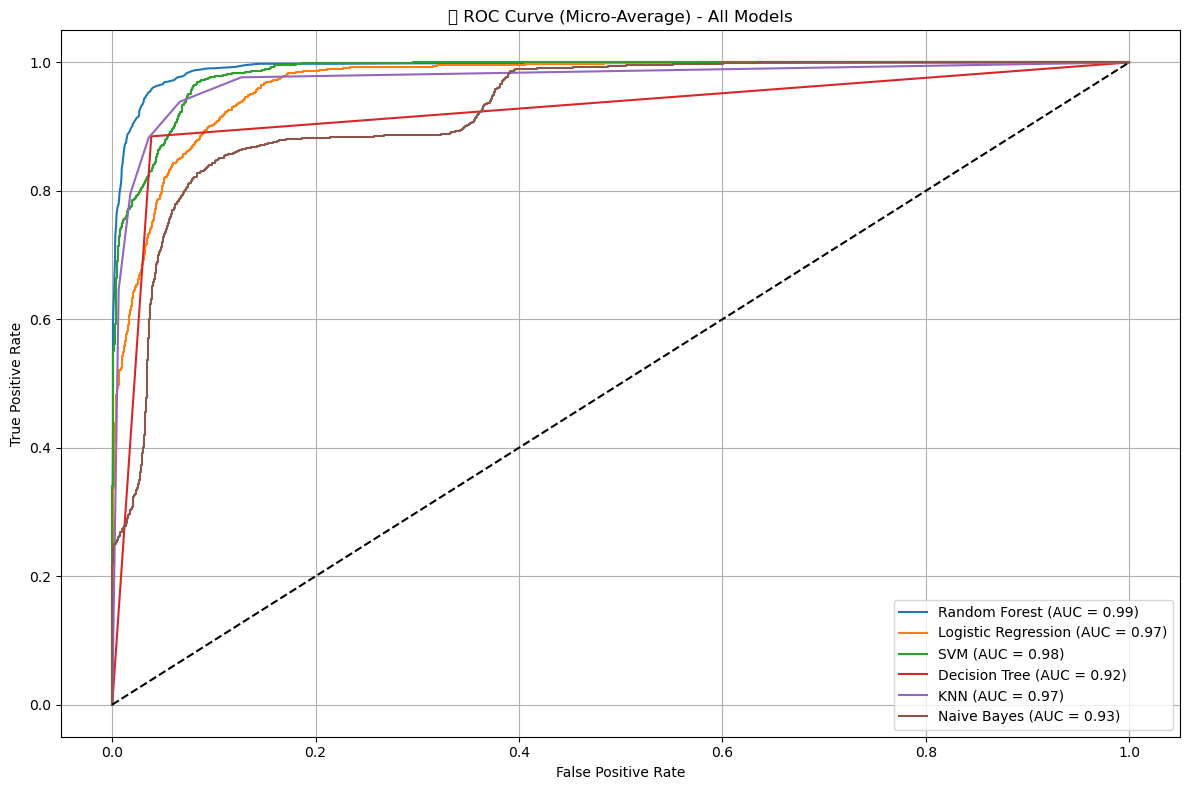

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

models_prob = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# ROC Curve for all models
plt.figure(figsize=(12, 8))

for name, model in models_prob.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)

    fpr[name], tpr[name], roc_auc[name] = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[name][i], tpr[name][i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[name][i] = auc(fpr[name][i], tpr[name][i])

    fpr[name]["micro"], tpr[name]["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc[name]["micro"] = auc(fpr[name]["micro"], tpr[name]["micro"])

    plt.plot(fpr[name]["micro"], tpr[name]["micro"],
             label=f"{name} (AUC = {roc_auc[name]['micro']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Curve (Micro-Average) - All Models')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
